# RL for Sum of Discounted Reward
- Mayer RL
    + sparse:
        + constraint: +1
        + target: -1

In [1]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)

from gym_reachability import gym_reachability  # Custom Gym env.
import gym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
from collections import namedtuple

from KC_DQN.DDQN import DDQN
from KC_DQN.config import dqnConfig

60000 120


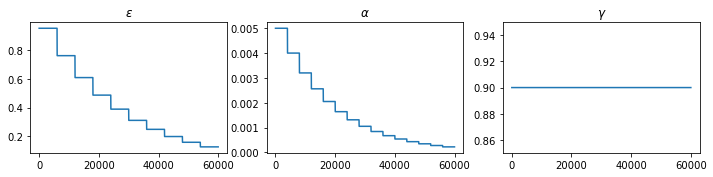

In [2]:
#== CONFIGURATION ==
toEnd = False
env_name = "zermelo_kc-v0"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

maxAccess = 2e6
maxSteps = 120
if toEnd:
    maxEpisodes = int(maxAccess / maxSteps * 2)
else:
    maxEpisodes = 60000
update_period = int(maxEpisodes / 10)

CONFIG = dqnConfig(DEVICE=device, ENV_NAME=env_name, 
                   MAX_EPISODES=maxEpisodes, MAX_EP_STEPS=maxSteps,
                   BATCH_SIZE=100, MEMORY_CAPACITY=10000,
                   LR_C=5e-3, LR_C_PERIOD=4000, LR_C_DECAY=0.8,
                   GAMMA_PERIOD=1000000,
                   EPS_PERIOD=update_period, EPS_DECAY=0.8)

#== REPORT ==
print(CONFIG.MAX_EPISODES, CONFIG.MAX_EP_STEPS)
fig, ax = plt.subplots(1, 3, figsize=(12,2.4))

eps = np.zeros(CONFIG.MAX_EPISODES)
lr = np.zeros(CONFIG.MAX_EPISODES)
gamma = np.zeros(CONFIG.MAX_EPISODES)
eps_tmp = CONFIG.EPSILON
lr_tmp = CONFIG.LR_C
gamma_tmp = CONFIG.GAMMA
for i in range(CONFIG.MAX_EPISODES):
    if i != 0 and i % CONFIG.EPS_PERIOD == 0:
        eps_tmp = max(eps_tmp*CONFIG.EPS_DECAY, 0.05)
    if i != 0 and i % CONFIG.LR_C_PERIOD == 0:
        lr_tmp *= CONFIG.LR_C_DECAY
    if i != 0 and i % CONFIG.GAMMA_PERIOD == 0:
        gamma_tmp = min(1-(1-gamma_tmp)*CONFIG.GAMMA_DECAY, 0.999999)
    eps[i] = eps_tmp
    lr[i] = lr_tmp
    gamma[i] = gamma_tmp
ax[0].plot(np.arange(CONFIG.MAX_EPISODES), eps)
ax[1].plot(np.arange(CONFIG.MAX_EPISODES), lr)
ax[2].plot(np.arange(CONFIG.MAX_EPISODES), gamma)
ax[0].set_title(r'$\epsilon$')
ax[1].set_title(r'$\alpha$')
ax[2].set_title(r'$\gamma$')
plt.show()

In [3]:
# == Environment ==
reward = -1
penalty = 1
if toEnd:
    env = gym.make(env_name, device=device, mode='extend', doneType='toEnd')
else:
    env = gym.make(env_name, device=device, mode='extend')
env.set_costParam(penalty, reward, 'extend')

# == Discretization ==
grid_cells = (41, 121)
num_states = np.cumprod(grid_cells)[-1]
state_bounds = env.bounds
env.set_discretization(grid_cells, state_bounds)
print(env.spec.id)

s_dim = env.state.shape[0]
action_num = env.action_space.n
print(s_dim, action_num)

action_list = np.arange(action_num)

#print(env.visual_initial_states)

Env: mode---extend; doneType---TF
zermelo_kc-v0
3 3


/Users/kaichieh/anaconda3/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Warmup Buffer [2000] --- Warmup Buffer Ends
Ep[  0 - (0.95,0.900000,5.0e-03)]: Running/Real cost: 0.10/1.00; 


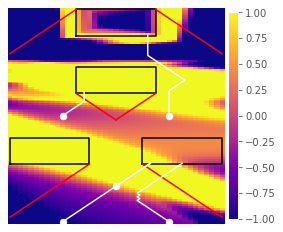

Ep[3000 - (0.95,0.900000,5.0e-03)]: Running/Real cost: 0.38/1.00; 


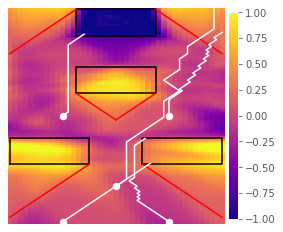

After [100000] accesses, success/failure/unfinished ratio: 0.543, 0.457, 0.000
Ep[6000 - (0.76,0.900000,4.0e-03)]: Running/Real cost: 0.87/1.00; 


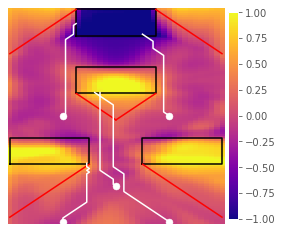

After [200000] accesses, success/failure/unfinished ratio: 0.410, 0.590, 0.000
Ep[9000 - (0.76,0.900000,3.2e-03)]: Running/Real cost: 0.51/1.00; 


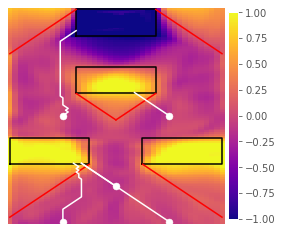

Ep[12000 - (0.61,0.900000,2.6e-03)]: Running/Real cost: 0.80/1.00; 


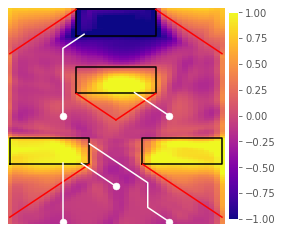

After [300000] accesses, success/failure/unfinished ratio: 0.641, 0.359, 0.000
Ep[15000 - (0.61,0.900000,2.6e-03)]: Running/Real cost: 0.84/1.00; 


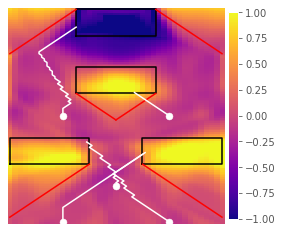

After [400000] accesses, success/failure/unfinished ratio: 0.641, 0.359, 0.000
Ep[18000 - (0.49,0.900000,2.0e-03)]: Running/Real cost: 0.65/1.00; 


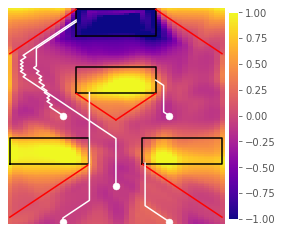

After [500000] accesses, success/failure/unfinished ratio: 0.680, 0.320, 0.000
Ep[21000 - (0.49,0.900000,1.6e-03)]: Running/Real cost: 0.45/1.00; 


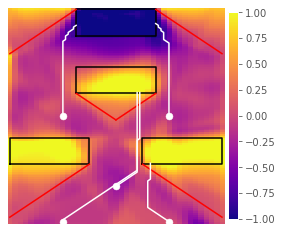

Ep[24000 - (0.39,0.900000,1.3e-03)]: Running/Real cost: 0.50/1.00; 


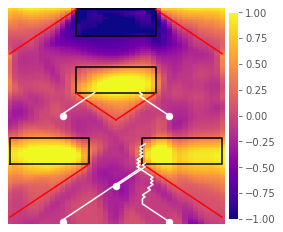

After [600000] accesses, success/failure/unfinished ratio: 0.650, 0.349, 0.000
Ep[27000 - (0.39,0.900000,1.3e-03)]: Running/Real cost: 0.03/-1.00; 


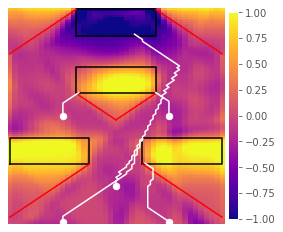

After [700000] accesses, success/failure/unfinished ratio: 0.300, 0.700, 0.000
Ep[30000 - (0.31,0.900000,1.0e-03)]: Running/Real cost: 0.36/-1.00; 


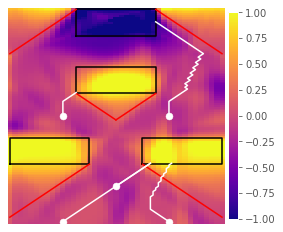

After [800000] accesses, success/failure/unfinished ratio: 0.626, 0.373, 0.000
Ep[33000 - (0.31,0.900000,8.4e-04)]: Running/Real cost: -0.12/1.00; 


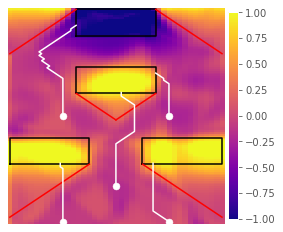

After [900000] accesses, success/failure/unfinished ratio: 0.644, 0.355, 0.000
Ep[36000 - (0.25,0.900000,6.7e-04)]: Running/Real cost: 0.12/1.00; 


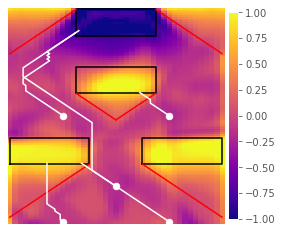

After [1000000] accesses, success/failure/unfinished ratio: 0.665, 0.335, 0.000
Ep[39000 - (0.25,0.900000,6.7e-04)]: Running/Real cost: -0.42/-1.00; 


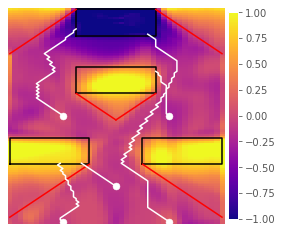

After [1100000] accesses, success/failure/unfinished ratio: 0.460, 0.540, 0.000
Ep[42000 - (0.20,0.900000,5.4e-04)]: Running/Real cost: 0.28/1.00; 


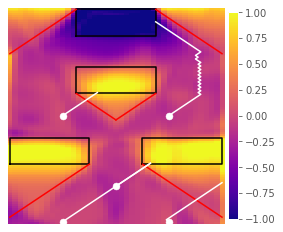

After [1200000] accesses, success/failure/unfinished ratio: 0.637, 0.362, 0.000
Ep[45000 - (0.20,0.900000,4.3e-04)]: Running/Real cost: 0.47/1.00; 


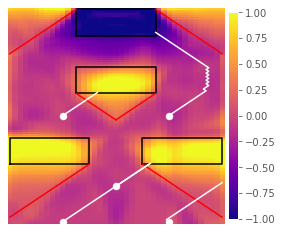

After [1300000] accesses, success/failure/unfinished ratio: 0.671, 0.329, 0.000
Ep[48000 - (0.16,0.900000,3.4e-04)]: Running/Real cost: -0.41/-1.00; 


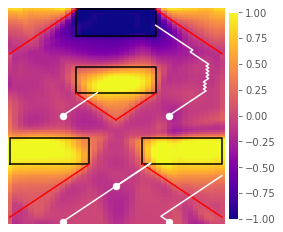

After [1400000] accesses, success/failure/unfinished ratio: 0.598, 0.403, 0.000
Ep[51000 - (0.16,0.900000,3.4e-04)]: Running/Real cost: 0.17/1.00; 


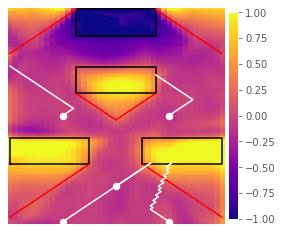

Ep[54000 - (0.13,0.900000,2.7e-04)]: Running/Real cost: -0.27/-1.00; 


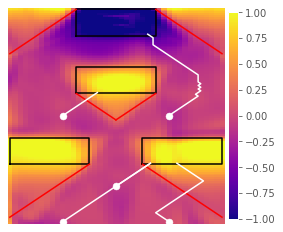

After [1500000] accesses, success/failure/unfinished ratio: 0.655, 0.345, 0.000
Ep[57000 - (0.13,0.900000,2.2e-04)]: Running/Real cost: -0.25/1.00; 


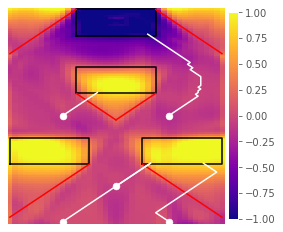

After [1600000] accesses, success/failure/unfinished ratio: 0.655, 0.345, 0.000


In [4]:
#== AGENT ==
vmin=-1
vmax=1
report_period = int(update_period / 2)
agent = DDQN(s_dim, action_num, CONFIG, action_list)
training_records, trainProgress = agent.learn(env, MAX_EPISODES=CONFIG.MAX_EPISODES, MAX_EP_STEPS=CONFIG.MAX_EP_STEPS,
                                              report_period=report_period, vmin=vmin, vmax=vmax, 
                                              randomPlot=False, toEnd=toEnd)

In [5]:
num_rnd_traj = 2000
_, tmp = env.simulate_trajectories(agent.Q_network, T=200, num_rnd_traj=num_rnd_traj, keepOutOf=False)
#tmp = env.plot_trajectories(agent.Q_network, T=200, num_rnd_traj=num_rnd_traj, keepOutOf=False)
print('successed rate: {:.3f}, failed rate: {:.3f}, unfinished rate: {:.3f}'.format(\
    np.sum(tmp==1)/tmp.shape[0], np.sum(tmp==-1)/tmp.shape[0], np.sum(tmp==0)/tmp.shape[0]))

successed rate: 0.653, failed rate: 0.346, unfinished rate: 0.000


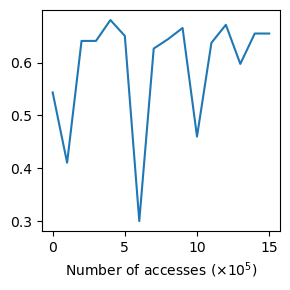

In [6]:
matplotlib.style.use('default')
fig, ax = plt.subplots(1,1,figsize=(3,3))
trainProgress = np.array(trainProgress)
ax.plot(np.arange(trainProgress.shape[0]), trainProgress[:,0])
ax.set_xlabel(r'Number of accesses ($\times10^5$)')
fig.tight_layout()
if toEnd:
    plt.savefig('figure/mayer_toend_train.eps')
else:
    plt.savefig('figure/mayer_train.eps')
plt.show()

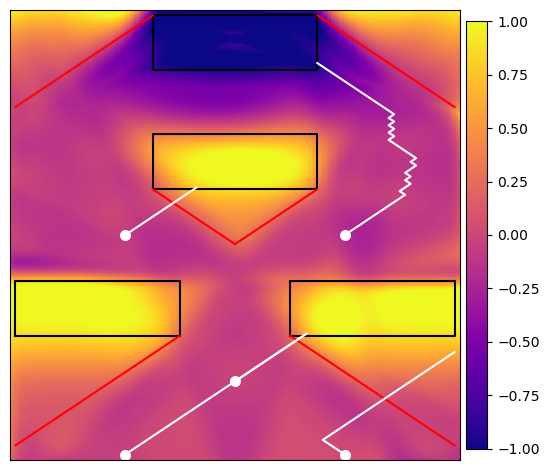

In [7]:
env.visualize_analytic_comparison(agent.Q_network, True, vmin=vmin, vmax=vmax, nx=201, ny=601, labels=None)
env.plot_reach_avoid_set()
env.plot_trajectories(agent.Q_network, T=150, num_rnd_traj=5, states=env.visual_initial_states)
plt.tight_layout()
if toEnd:
    plt.savefig('figure/mayer_toend.eps')
else:
    plt.savefig('figure/mayer.eps')

##### 